In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
df = pd.read_csv('../input/vehicle-dataset-from-cardekho/Car details v3.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Data Cleaning

### Part 1. Dealing with numerical NaN's

In [3]:
df = df.drop('name', axis=1)

In [4]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

#### Replacing null values and doing additional manipulation for 'mileage' column

In [6]:
# for rindex, rrindex in enumerate(df['mileage']):
#     df['mileage'] = df['mileage'][rindex].replace(' kmpl', '')
#     print(rindex)

df['mileage'].replace(' kmpl', '', inplace=True, regex=True)
df['mileage'].replace(' km/kg', '', inplace=True, regex=True)


# df['mileage'].apply(lambda x: x.replace(' kmpl', ''))
#     f[1] = df[1].apply(lambda x: x + 1)
# pd.to_numeric(df['mileage'], errors='raise')
# df

In [7]:
pd.to_numeric(df['mileage'])

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

In [8]:
df_2 = df[~df['mileage'].isnull()]
#df[df['column name'].isnull()]
mileages = pd.to_numeric(df_2['mileage'])
impute_value = mileages.mean()
print(f'Value for imputation (based off the mean of mileages): {round(impute_value, 2)}')

Value for imputation (based off the mean of mileages): 19.42


In [9]:
df.mileage = df.mileage.fillna(value=round(impute_value, 2))
df.mileage.isna().sum()
df.mileage = pd.to_numeric(df.mileage)

In [10]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


#### 'Engine' column

In [11]:
df.engine.isna().sum()

221

In [12]:
# Same process as 'mileage' column
# df['mileage'].replace(' kmpl', '', inplace=True, regex=True)
df.engine.replace(' CC', '', inplace=True, regex=True)
pd.to_numeric(df.engine)
df_engines = df[~df['engine'].isnull()]
#df[df['column name'].isnull()]
engines = pd.to_numeric(df_engines['engine'])
impute_value_engine = int(round(engines.mean(), 0))
print(f'Value for imputation (based off the mean of mileages): {impute_value_engine}')

#Perform imputation
df.engine = df.engine.fillna(value=impute_value_engine)
df.engine = pd.to_numeric(df.engine)

#Check results
print(f'Number of nans: {df.engine.isna().sum()}')

Value for imputation (based off the mean of mileages): 1459
Number of nans: 0


#### Repeating the process for 'max_power'

In [13]:
#Same process as above (I should really have a function built for this by now!)
# Same process as 'mileage' column
# df['mileage'].replace(' kmpl', '', inplace=True, regex=True)
df.max_power.replace(' bhp', '', inplace=True, regex=True)
pd.to_numeric(df.max_power)
df_mp = df[~df['max_power'].isnull()]
#df[df['column name'].isnull()]
mp = pd.to_numeric(df_mp['max_power'])
impute_value_mp = int(round(mp.mean(), 1))
print(f'Value for imputation (based off the mean of mileages): {impute_value_mp}')

#Perform imputation
df.max_power = df.max_power.fillna(value=impute_value_mp)
df.max_power = pd.to_numeric(df.max_power)

#Check results
print(f'Number of nans: {df.max_power.isna().sum()}')

Value for imputation (based off the mean of mileages): 91
Number of nans: 1


#### Dropping the 'torque' column

In [14]:
df_nt = df.drop('torque', axis=1)

In [15]:
df_nt

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396,70.00,5.0


In [16]:
df_nt.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats            float64
dtype: object

#### Dealing with 'seats'

In [17]:
df_nt.seats.value_counts()

5.0     6254
7.0     1120
8.0      236
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [18]:
#We'll be replacing missing values for the 'seats' column with '5.0', the mode.

In [19]:
df_nt.seats = df_nt.seats.fillna(value=5.0)
print(f'Number of nans for seats column: {df_nt.seats.isna().sum()}')

Number of nans for seats column: 0


### Part 2. Dealing with categorical values

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

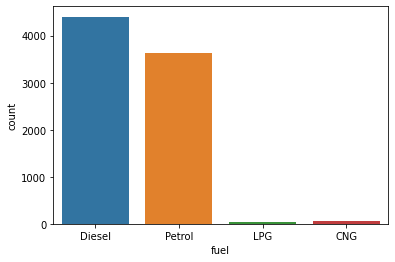

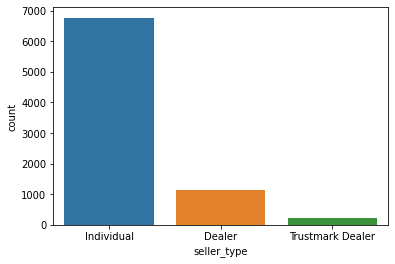

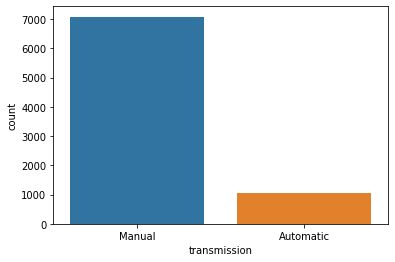

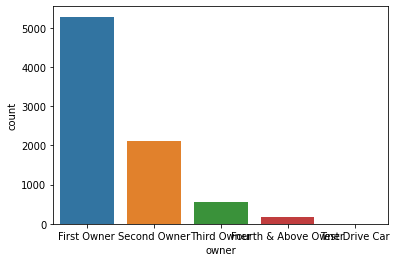

In [21]:
#Basic plotting to get a better understanding of categorical columns
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']

for i in cat_cols:
    sns.countplot(x=i, data = df_nt)
    plt.show()

In [22]:
# We can use OHE and OrdinalEncoding to deal with all categorical columns swiftly and efficiently
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

#### Dealing with 'Transmission' column

In [23]:
#Simple binary encoding, 0 if manual, 1 if automatic
mapper = {'Manual':0, 'Automatic':1}
df_nt.transmission = df_nt.transmission.replace(mapper)
df_nt.transmission.value_counts()

0    7078
1    1050
Name: transmission, dtype: int64

#### OHE

In [24]:
import numpy as np

In [25]:
# cols = ['fuel', 'seller_type']
# ohe = OneHotEncoder()
# feature_array = ohe.fit_transform(df[['fuel', 'seller_type']]).toarray()
# feature_array

In [26]:
# feature_labels = ohe.categories_
# # feature_labels =  np.ndarray.flatten(feature_labels)
# feature_labels

In [27]:
# cols = ['CNG', 'Diesel', 'LPG', 'Petrol', 'Dealer', 'Individual' ,'Trustmark Dealer']
# # '1983', '1991', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
#         #'2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
#        # '2014', '2015', '2016', '2017', '2018', '2019', '2020'

In [28]:
# df_OHE = pd.DataFrame(feature_array)

# df_OHE
# # feature_array

In [29]:
# df_nt = df_nt.drop(['fuel', 'seller_type'], axis=1)

In [30]:
# df_nt

In [31]:
# df_nt = pd.concat([df_nt, df_OHE], axis=1)

In [32]:
# df_nt

#### Dealing with 'owner' column and OrdinalEncoder

In [33]:
from sklearn.compose import ColumnTransformer

In [34]:
df.fuel.unique()
# df.seller_type.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [35]:
df_nt

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,0,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,Diesel,Individual,0,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,Petrol,Individual,0,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,Diesel,Individual,0,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,Petrol,Individual,0,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,0,First Owner,18.50,1197,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,0,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,2009,382000,120000,Diesel,Individual,0,First Owner,19.30,1248,73.90,5.0
8126,2013,290000,25000,Diesel,Individual,0,First Owner,23.57,1396,70.00,5.0


In [36]:
#Wrapper for seller_type
mapp = {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}
df_nt.seller_type = df_nt.seller_type.replace(mapp)

#Wrapper for fuel
mapp2 = {'Diesel': 0, 'Petrol': 1, 'LPG': 2, 'CNG': 3}
df_nt.fuel= df_nt.fuel.replace(mapp2)

#Simple binary encoding, 0 if manual, 1 if automatic
mapper = {'Manual':0, 'Automatic':1}
df_nt.transmission = df_nt.transmission.replace(mapper)
df_nt.transmission.value_counts()

0    7078
1    1050
Name: transmission, dtype: int64

In [37]:
df_nt

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,First Owner,23.40,1248,74.00,5.0
1,2014,370000,120000,0,0,0,Second Owner,21.14,1498,103.52,5.0
2,2006,158000,140000,1,0,0,Third Owner,17.70,1497,78.00,5.0
3,2010,225000,127000,0,0,0,First Owner,23.00,1396,90.00,5.0
4,2007,130000,120000,1,0,0,First Owner,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,First Owner,18.50,1197,82.85,5.0
8124,2007,135000,119000,0,0,0,Fourth & Above Owner,16.80,1493,110.00,5.0
8125,2009,382000,120000,0,0,0,First Owner,19.30,1248,73.90,5.0
8126,2013,290000,25000,0,0,0,First Owner,23.57,1396,70.00,5.0


In [38]:
# model_ODE = ColumnTransformer(
#     [('ODE', OrdinalEncoder(),['owner'])],
#     remainder = 'passthrough'
#     )

# fuix = model_ODE.fit_transform(df_nt)
# pd.DataFrame(fuix) 
# df_nt.owner.unique()
cats = ['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner', 'Test Drive Car']
fuel_cats = []
seller_type_cats = []

# cats
ordi = OrdinalEncoder(categories=[cats])
ordi.fit(df_nt[['owner']])

OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner',
                            'Fourth & Above Owner', 'Test Drive Car']])

In [39]:
df_nt.owner = pd.DataFrame(ordi.transform(df_nt[['owner']])) 

Additional fixes

In [40]:
df_nt.max_power = df_nt.max_power.fillna(impute_value_mp)
df_nt.max_power.isna().sum()

df_nt.isna().sum().sum()

0

#### Dealing with 'year'

### Model Splitting / Training

In [41]:
df_nt.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel               int64
seller_type        int64
transmission       int64
owner            float64
mileage          float64
engine             int64
max_power        float64
seats            float64
dtype: object

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [43]:
y = df_nt.selling_price
X = df_nt.drop('selling_price', axis=1)
# X = df_nt.drop(['selling_price', 'km_driven'], axis=1)

In [44]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 1)

X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
1939,2014,100000,0,0,0,1.0,25.80,1498,98.60,5.0
5455,2016,120000,0,0,0,1.0,26.59,1248,74.00,5.0
7079,2012,100000,0,0,0,1.0,21.80,1461,78.00,5.0
2000,2011,80000,1,0,0,1.0,16.00,1198,90.00,5.0
1578,2016,56494,1,2,0,0.0,18.20,1199,88.70,5.0
...,...,...,...,...,...,...,...,...,...,...
7935,1999,100000,1,0,0,2.0,16.10,796,37.00,4.0
5192,2016,152000,0,0,0,0.0,21.19,1396,88.73,5.0
3980,2013,70000,1,0,0,0.0,21.10,814,55.20,5.0
235,2010,110000,0,0,0,1.0,21.10,1248,73.90,5.0


In [45]:
#Scaling the data for Linear Regression
    
scaler = StandardScaler()

scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

# Running linear regression

LR = LinearRegression()
LR.fit(scaled_X_train, y_train)
y_pred_LR = LR.predict(scaled_X_test)

X_train
scaled_X_train


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0.043356,0.591349,-0.869079,-0.428470,-0.390944,0.746832,1.615652,0.075617,0.189785,-0.425543
1,0.539226,0.980965,-0.869079,-0.428470,-0.390944,0.746832,1.815501,-0.429495,-0.499886,-0.425543
2,-0.452514,0.591349,-0.869079,-0.428470,-0.390944,0.746832,0.603756,0.000860,-0.387744,-0.425543
3,-0.700449,0.201732,0.956099,-0.428470,-0.390944,0.746832,-0.863493,-0.530517,-0.051319,-0.425543
4,0.539226,-0.256184,0.956099,3.811879,-0.390944,-0.637010,-0.306950,-0.528497,-0.087765,-0.425543
...,...,...,...,...,...,...,...,...,...,...
6497,-3.675668,0.591349,0.956099,-0.428470,-0.390944,2.130675,-0.838195,-1.342737,-1.537196,-1.481201
6498,0.539226,1.604351,-0.869079,-0.428470,-0.390944,-0.637010,0.449442,-0.130469,-0.086924,-0.425543
6499,-0.204579,0.006924,0.956099,-0.428470,-0.390944,-0.637010,0.426674,-1.306369,-1.026951,-0.425543
6500,-0.948384,0.786157,-0.869079,-0.428470,-0.390944,0.746832,0.426674,-0.429495,-0.502689,-0.425543


Assessing the model

In [46]:
xgbr = XGBRegressor(verbosity=0)
xgbr.fit(X_train, y_train)
# print(xgbr.score(scaled_X_train, y_train))

y_pred_X = xgbr.predict(X_test)

### Assessing model performance

In [47]:
from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse
import math

In [48]:
def get_metrics(preds, actual, model_type):
    r2s = r2(preds, actual)
    maes = mae(preds, actual)
    mses = mse(preds, actual)
    rmses = math.sqrt(mses)
#     return rmse, mse, mae, r2
    df = pd.DataFrame([r2s, maes, mses, rmses, model_type]).transpose()
    df.columns = ['r2 coeff.', 'MAE', 'MSE', 'RMSE', 'Type of model']
    return df

In [49]:
df_metrics = get_metrics(y_pred_LR, y_test, 'Linear Regression')
df_metrics_X = get_metrics(y_pred_X, y_test, 'XGBR')

df_metrics = pd.concat([df_metrics, df_metrics_X], axis=0)
df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,0.582183,270351.821424,183487547550.807343,428354.464843,Linear Regression
0,0.970595,66802.167023,13703221977.427296,117060.761903,XGBR


# Back to the drawing-board
### Let's perform some feature engineering and attempt to fix-up our model

In [50]:
from matplotlib import rcParams

In [51]:
# sns.pairplot(data=df)

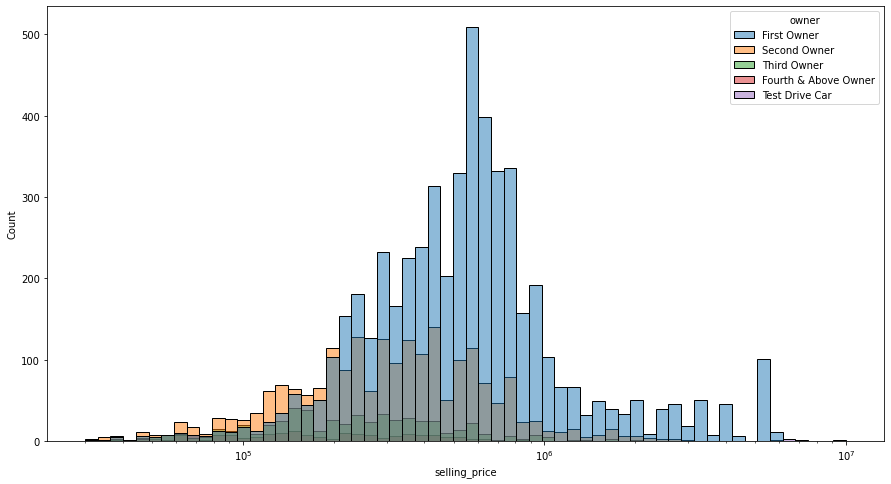

In [52]:
rcParams['figure.figsize'] = 15,8
sns.histplot(x='selling_price', hue='owner', data=df, log_scale=True);

We can see that it's pretty heavily skewed, so if you're a first owner that's a lot better than the second third fourth and test drive cars

In [53]:
df.owner.value_counts()/ len(df.owner)

First Owner             0.650714
Second Owner            0.258981
Third Owner             0.068282
Fourth & Above Owner    0.021407
Test Drive Car          0.000615
Name: owner, dtype: float64

For this, let's combine the classes of '2nd', '3rd', 'fourth and above', and 'test drive car into one variable'

In [54]:
#Wrapper
wr = {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 1, 'Fourth & Above Owner': 1, 'Test Drive Car': 1}
df.owner = df.owner.replace(wr)
df.owner.value_counts()

0    5289
1    2839
Name: owner, dtype: int64

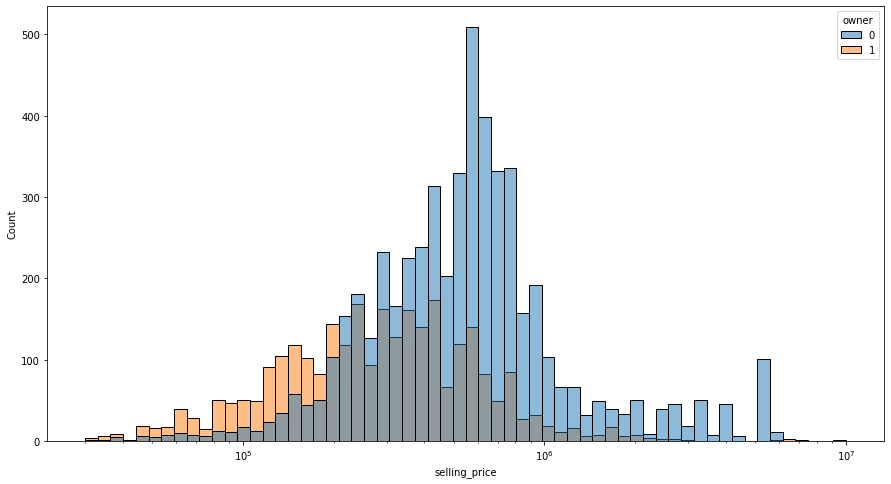

In [55]:
sns.histplot(x='selling_price', hue='owner', data=df, log_scale=True);

In [56]:
df.fuel.dtype

dtype('O')

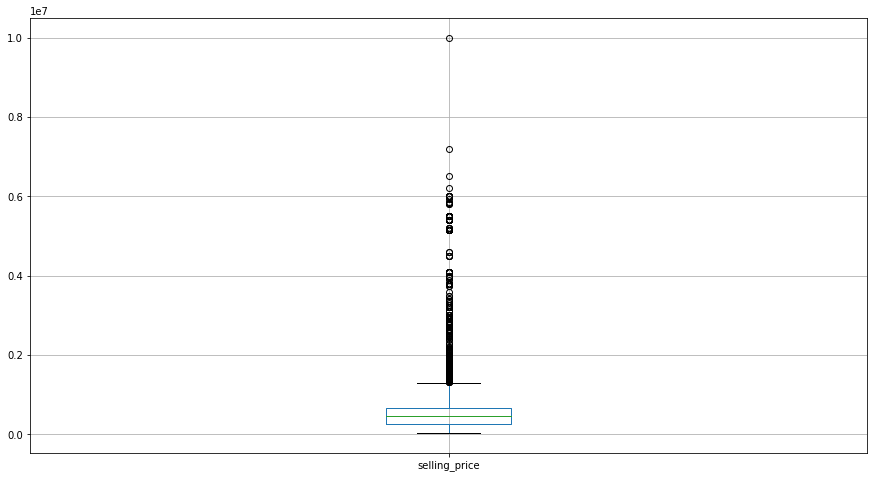

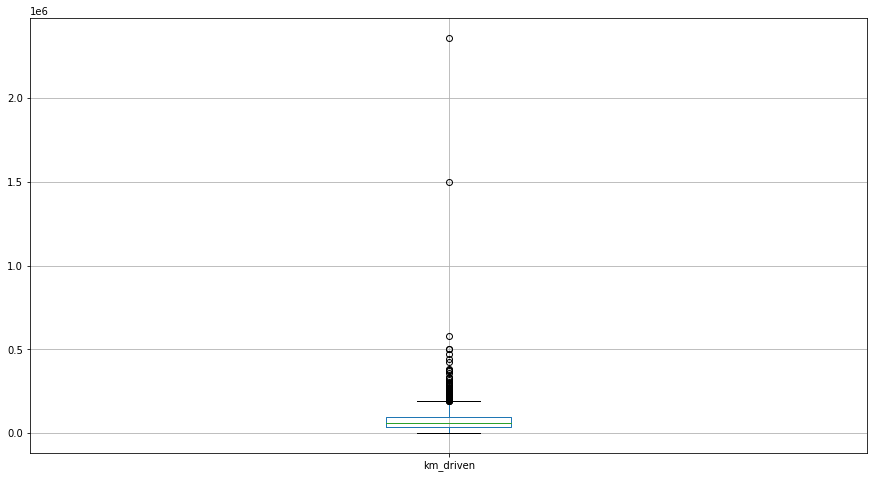

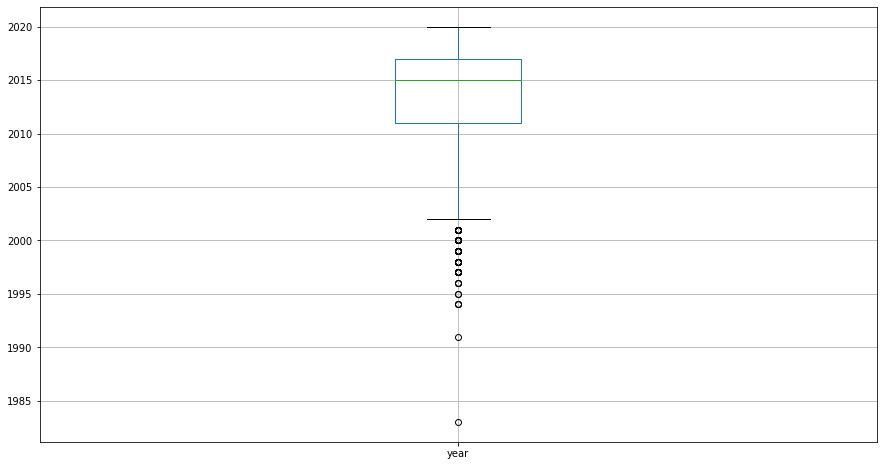

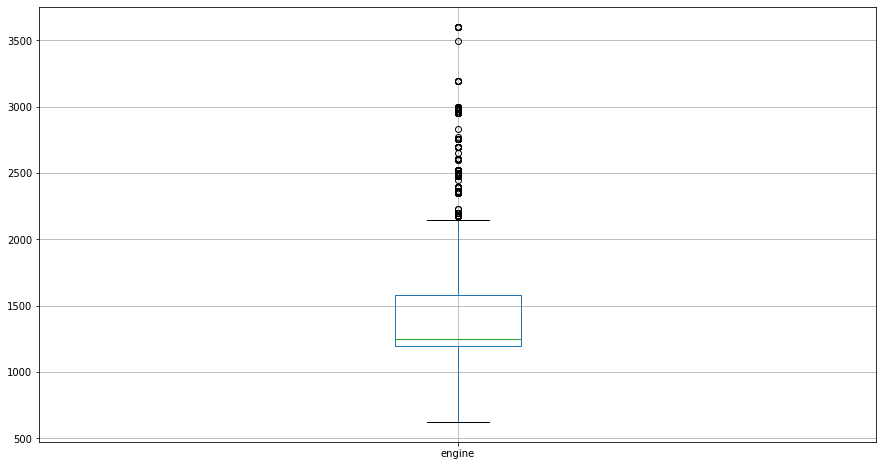

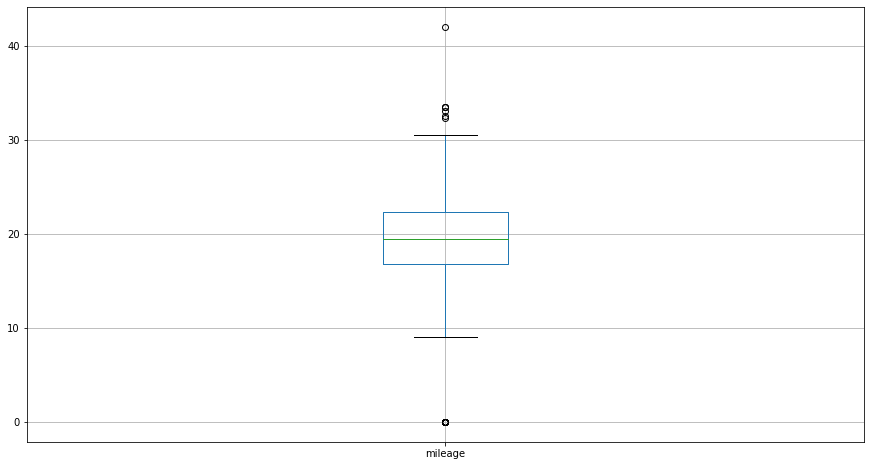

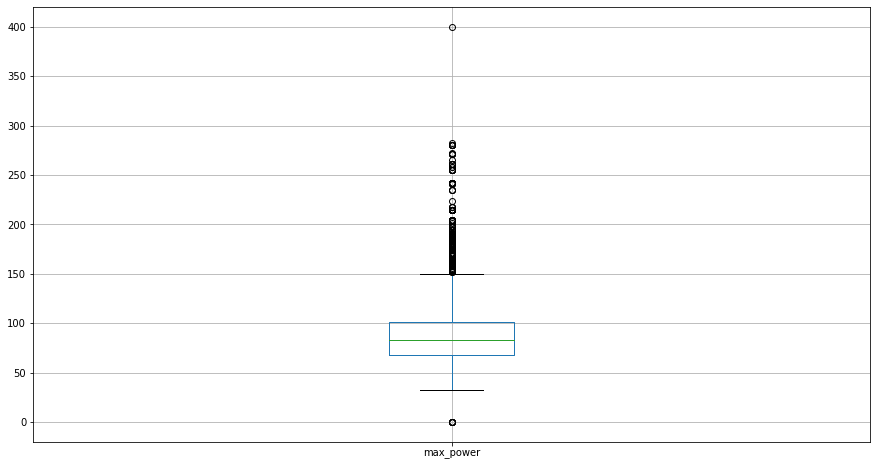

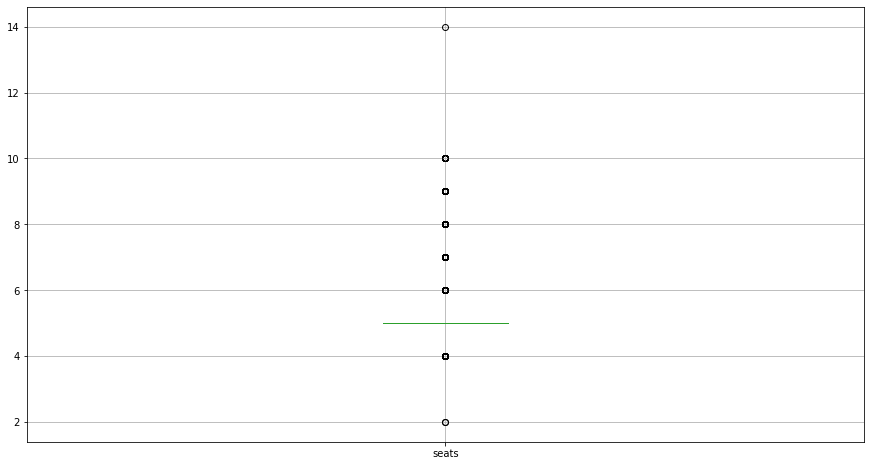

In [57]:
numerical_cols = ['selling_price', 'km_driven', 'year', 'engine', 'mileage', 'max_power', 'seats']
for col in numerical_cols:
    df.boxplot(col)
    plt.show()

Seem to be some outliers, especially that one on the top. Let's get rid of that value using z-scores

In [58]:
from scipy.stats import zscore

In [59]:
def gen_zscores(df, col):
    df['zscore_'+col] = zscore(df[col])

[gen_zscores(df, nc) for nc in numerical_cols]

df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,zscore_selling_price,zscore_km_driven,zscore_year,zscore_engine,zscore_mileage,zscore_max_power,zscore_seats
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0,-0.233529,1.338363,0.048464,-0.423824,0.999888,NaN,NaN
1,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,-0.332759,0.887411,0.048464,0.079207,0.432281,NaN,NaN
2,2006,158000,140000,Petrol,Individual,Manual,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,-0.595720,1.241098,-1.929775,0.077195,-0.431687,NaN,NaN
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-0.512615,1.011202,-0.940656,-0.126030,0.899426,NaN,NaN
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-0.630451,0.887411,-1.682495,-0.323218,-0.833532,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,-0.394778,0.710567,-0.198816,-0.526443,-0.230764,NaN,NaN
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,-0.624249,0.869726,-1.682495,0.069146,-0.657725,NaN,NaN
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0,-0.317875,0.887411,-1.187935,-0.423824,-0.029841,NaN,NaN
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,-0.431990,-0.792605,-0.198816,-0.126030,1.042584,NaN,NaN


In [60]:
# df = df.drop('zscore_max_power', axis=1)
# df = df.drop('zscore_seats', axis=1)

In [61]:
df.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,zscore_selling_price,zscore_km_driven,zscore_year,zscore_engine,zscore_mileage,zscore_max_power,zscore_seats
count,8128.000000,8.128000e+03,8.128000e+03,8128.000000,8128.000000,8128.000000,8127.000000,7907.000000,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03,8.128000e+03,0.0,0.0
mean,2013.804011,6.382718e+05,6.981951e+04,0.349286,19.418816,1458.635212,91.504217,5.416719,1.672301e-16,-4.261683e-17,-4.811098e-15,1.363056e-16,-8.269304e-16,NaN,NaN
std,4.044249,8.062534e+05,5.655055e+04,0.476774,3.981875,497.017508,35.345519,0.959588,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,1.000062e+00,NaN,NaN
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,0.000000,624.000000,0.000000,2.000000,-7.544901e-01,-1.234697e+00,-7.617213e+00,-1.679391e+00,-4.877102e+00,NaN,NaN
25%,2011.000000,2.549990e+05,3.500000e+04,0.000000,16.800000,1197.000000,68.100000,5.000000,-4.754044e-01,-6.157615e-01,-6.933756e-01,-5.264428e-01,-6.577247e-01,NaN,NaN
50%,2015.000000,4.500000e+05,6.000000e+04,0.000000,19.420000,1248.000000,83.100000,5.000000,-2.335288e-01,-1.736520e-01,2.957441e-01,-4.238244e-01,2.972559e-04,NaN,NaN
75%,2017.000000,6.750000e+05,9.800000e+04,1.000000,22.277500,1582.000000,101.500000,5.000000,4.555696e-02,4.983545e-01,7.903040e-01,2.482254e-01,7.179681e-01,NaN,NaN
max,2020.000000,1.000000e+07,2.360457e+06,1.000000,42.000000,3604.000000,400.000000,14.000000,1.161211e+01,4.050850e+01,1.532144e+00,4.316743e+00,5.671341e+00,NaN,NaN


In [62]:
df[df['zscore_selling_price'] > 5]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,zscore_selling_price,zscore_km_driven,zscore_year,zscore_engine,zscore_mileage,zscore_max_power,zscore_seats
132,2019,5150000,20000,Petrol,Dealer,Automatic,0,22.37,2487,214.56,202Nm@ 3600-5200rpm,5.0,5.596263,-0.881027,1.284864,2.069199,0.741200,NaN,NaN
136,2017,6000000,37000,Diesel,Dealer,Automatic,0,13.50,2987,254.79,620Nm@ 1600-2400rpm,5.0,6.650587,-0.580393,0.790304,3.075262,-1.486531,NaN,NaN
139,2019,5800000,7500,Diesel,Dealer,Automatic,0,16.78,1995,190.00,400Nm@ 1750-2500rpm,5.0,6.402510,-1.102082,1.284864,1.079233,-0.662748,NaN,NaN
148,2017,5850000,47000,Diesel,Dealer,Automatic,0,13.50,2987,282.00,490Nm@ 1600rpm,5.0,6.464529,-0.403549,0.790304,3.075262,-1.486531,NaN,NaN
170,2017,10000000,30000,Petrol,Individual,Automatic,0,42.00,1969,400.00,640Nm@ 1740rpm,4.0,11.612111,-0.704183,0.790304,1.026918,5.671341,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7757,2019,5200000,10000,Diesel,Dealer,Automatic,0,18.12,1995,190.00,400Nm@ 1750-2500rpm,5.0,5.658282,-1.057871,1.284864,1.079233,-0.326202,NaN,NaN
7859,2019,5150000,20000,Petrol,Dealer,Automatic,0,22.37,2487,214.56,202Nm@ 3600-5200rpm,5.0,5.596263,-0.881027,1.284864,2.069199,0.741200,NaN,NaN
7872,2019,5400000,7500,Diesel,Dealer,Automatic,0,16.78,1995,190.00,400Nm@ 1750-2500rpm,5.0,5.906358,-1.102082,1.284864,1.079233,-0.662748,NaN,NaN
7873,2019,5500000,8500,Diesel,Dealer,Automatic,0,16.78,1995,190.00,400Nm@ 1750-2500rpm,5.0,6.030396,-1.084398,1.284864,1.079233,-0.662748,NaN,NaN


In [63]:
df = df[(df.zscore_selling_price>-5) & (df.zscore_selling_price<5)]

In [64]:
df = df.drop('zscore_selling_price', axis=1)

In [65]:
def rid_outliers(df, col, zscore_val):
    df = df.copy()
    df = df[(df[col]>-(zscore_val)) & (df[col]<zscore_val)]
    df = df.drop([col], axis=1)
    return df

In [66]:
df = rid_outliers(df, 'zscore_km_driven', 4.5)
# df = df.drop('zscore_km_driven', axis=1)

df = df.drop([8042, 316], axis=0)

df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,zscore_year,zscore_engine,zscore_mileage,zscore_max_power,zscore_seats
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0,0.048464,-0.423824,0.999888,NaN,NaN
1,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,0.048464,0.079207,0.432281,NaN,NaN
2,2006,158000,140000,Petrol,Individual,Manual,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,-1.929775,0.077195,-0.431687,NaN,NaN
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-0.940656,-0.126030,0.899426,NaN,NaN
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-1.682495,-0.323218,-0.833532,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,-0.198816,-0.526443,-0.230764,NaN,NaN
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,-1.682495,0.069146,-0.657725,NaN,NaN
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0,-1.187935,-0.423824,-0.029841,NaN,NaN
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,-0.198816,-0.126030,1.042584,NaN,NaN


In [67]:
df = df.drop('zscore_year', axis=1)

In [68]:
# df[df.zscore_mileage > 3.0]
df = rid_outliers(df, 'zscore_mileage', 3.0)

In [69]:
df = df.drop(['zscore_max_power', 'zscore_seats'], axis=1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,zscore_engine
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0,-0.423824
1,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,0.079207
2,2006,158000,140000,Petrol,Individual,Manual,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,0.077195
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-0.126030
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-0.323218
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,-0.526443
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,0.069146
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0,-0.423824
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,-0.126030


In [70]:
df = rid_outliers(df, 'zscore_engine', 3.4)

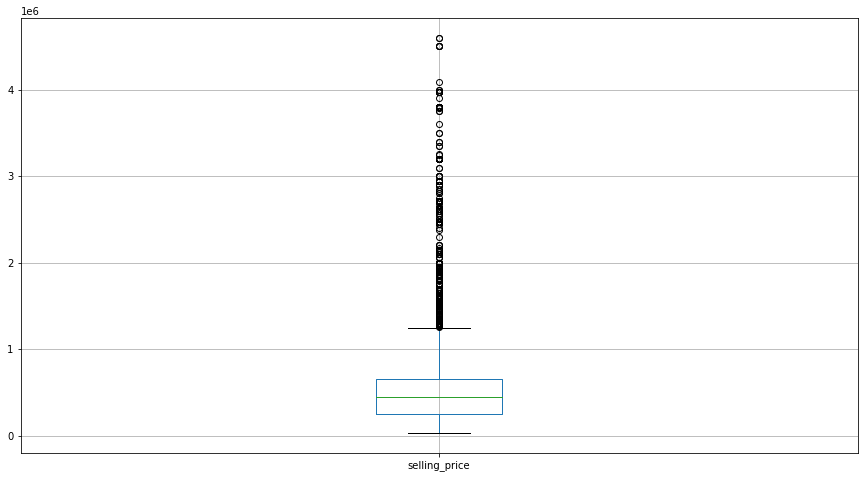

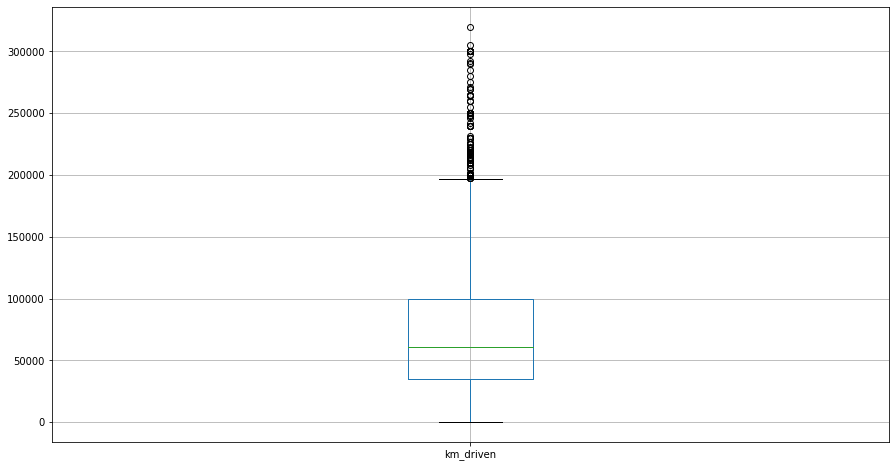

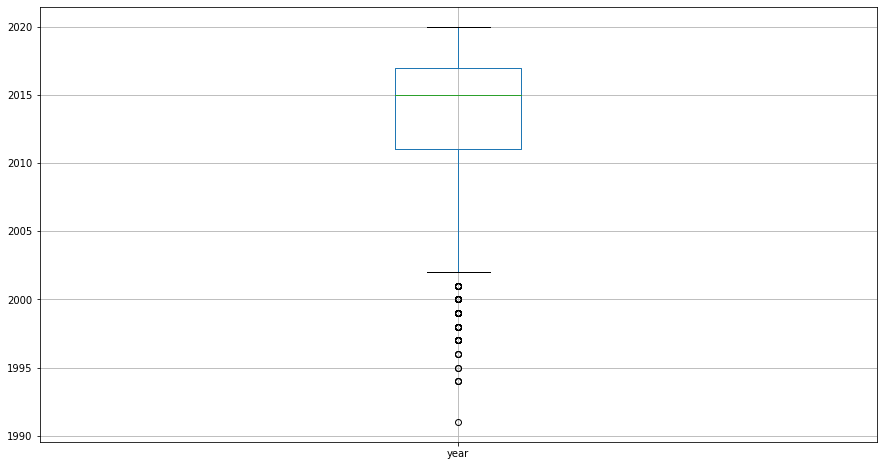

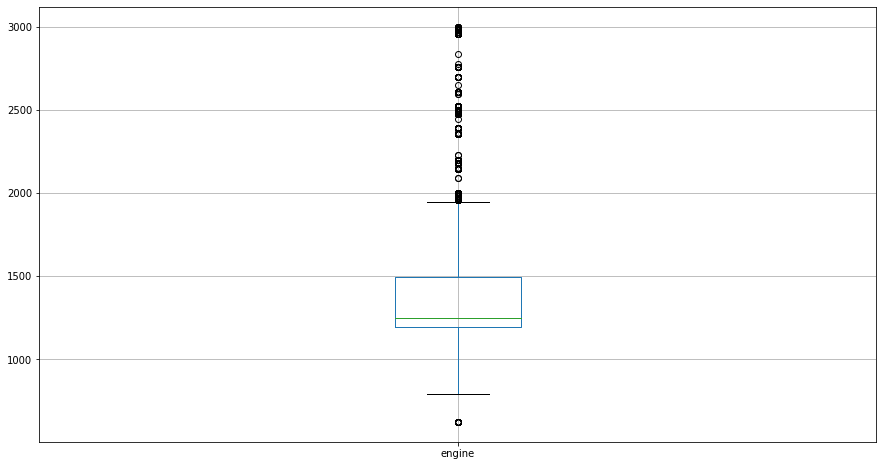

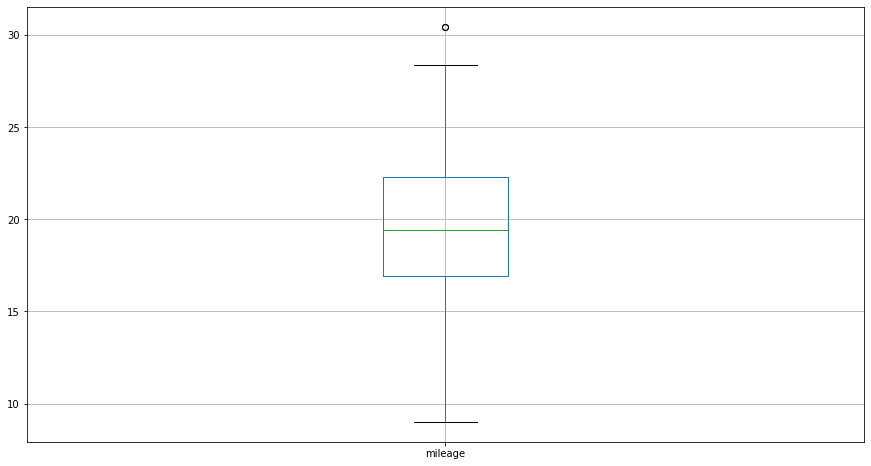

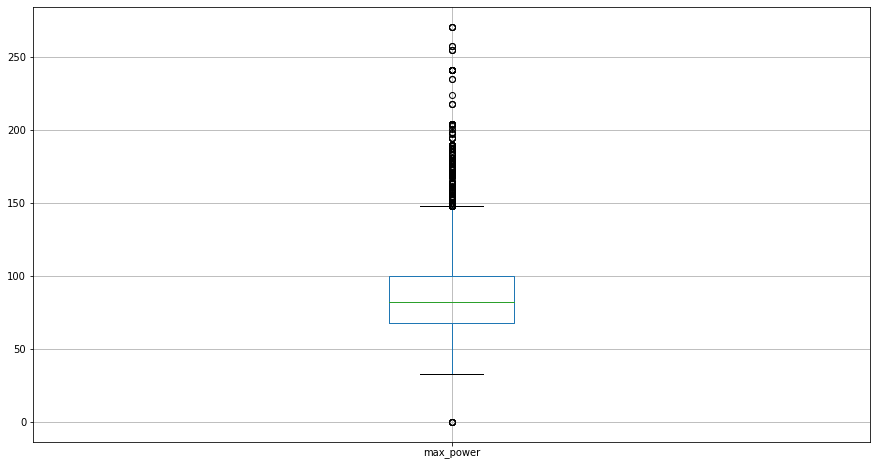

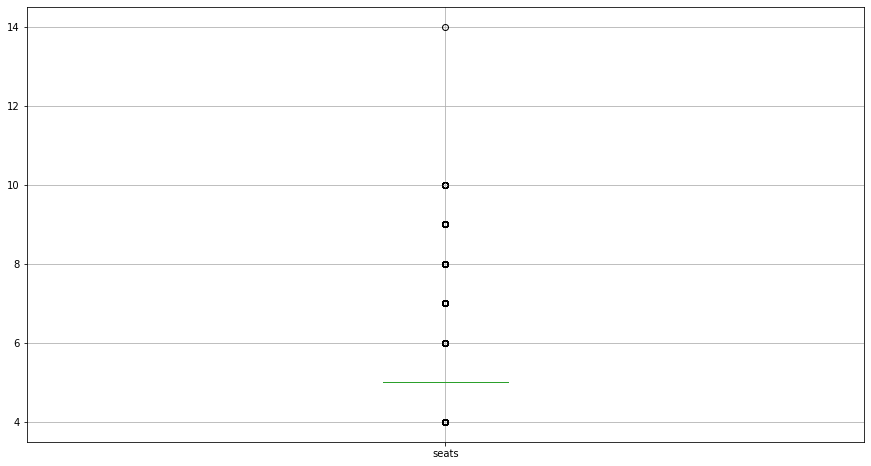

In [71]:
numerical_cols = ['selling_price', 'km_driven', 'year', 'engine', 'mileage', 'max_power', 'seats']
for col in numerical_cols:
    df.boxplot(col)
    plt.show()

Data looks a bit better in terms of outliers, let's add one final touch

In [72]:
df[df.seats == 14.0]

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4575,2010,235000,50000,Diesel,Individual,Manual,0,10.71,1948,90.0,190Nm@ 2000-3000rpm,14.0


In [73]:
#From above, the index is 4575, dropping this index due to the seat count being so high (probably a bus, we're trying to predict car selling prices)
df = df.drop(4575)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,Petrol,Individual,Manual,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0


In [74]:
[gen_zscores(df, nc) for nc in numerical_cols]
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,zscore_selling_price,zscore_km_driven,zscore_year,zscore_engine,zscore_mileage,zscore_max_power,zscore_seats
0,2014,450000,145500,Diesel,Individual,Manual,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0,-0.208806,1.664172,0.065140,-0.404496,1.014920,NaN,NaN
1,2014,370000,120000,Diesel,Individual,Manual,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0,-0.355701,1.104736,0.065140,0.113414,0.428272,NaN,NaN
2,2006,158000,140000,Petrol,Individual,Manual,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0,-0.744973,1.543509,-1.930325,0.111343,-0.464679,NaN,NaN
3,2010,225000,127000,Diesel,Individual,Manual,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0,-0.621949,1.258307,-0.932592,-0.097893,0.911088,NaN,NaN
4,2007,130000,120000,Petrol,Individual,Manual,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0,-0.796387,1.104736,-1.680892,-0.300914,-0.880005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0,-0.447511,0.885350,-0.184293,-0.510149,-0.257016,NaN,NaN
8124,2007,135000,119000,Diesel,Individual,Manual,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0,-0.787206,1.082797,-1.680892,0.103056,-0.698300,NaN,NaN
8125,2009,382000,120000,Diesel,Individual,Manual,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0,-0.333667,1.104736,-1.182025,-0.404496,-0.049353,NaN,NaN
8126,2013,290000,25000,Diesel,Individual,Manual,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0,-0.502596,-0.979436,-0.184293,-0.097893,1.059048,NaN,NaN


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


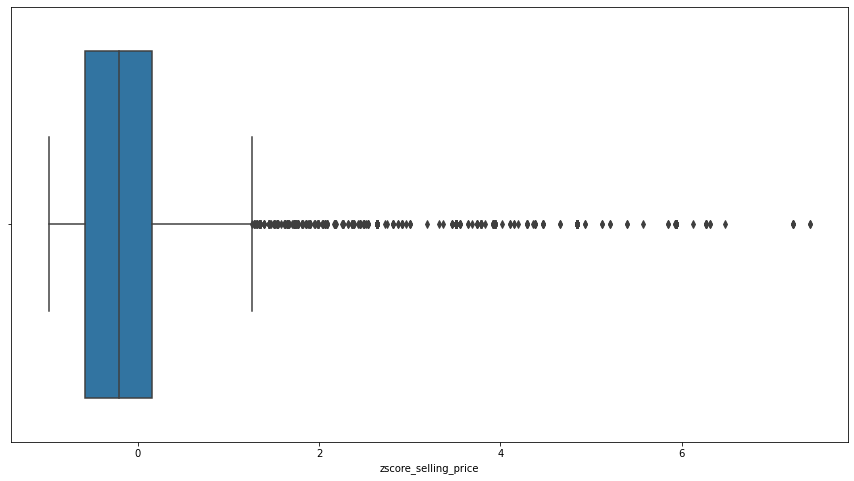

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


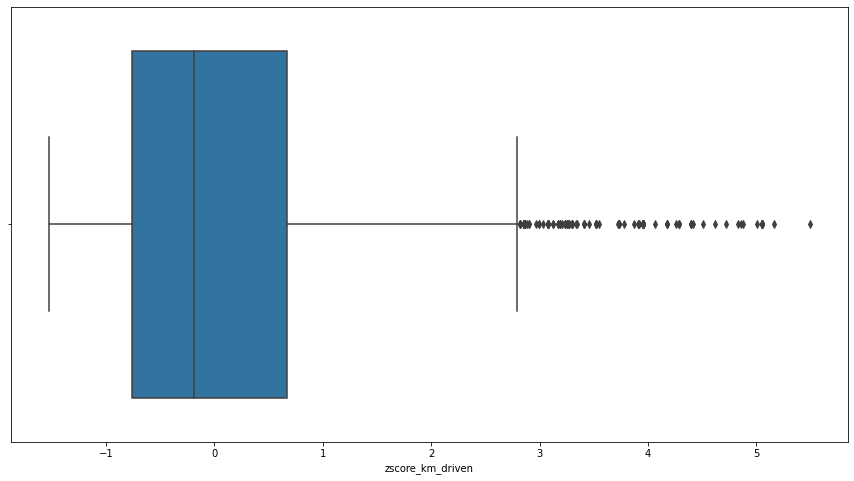

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


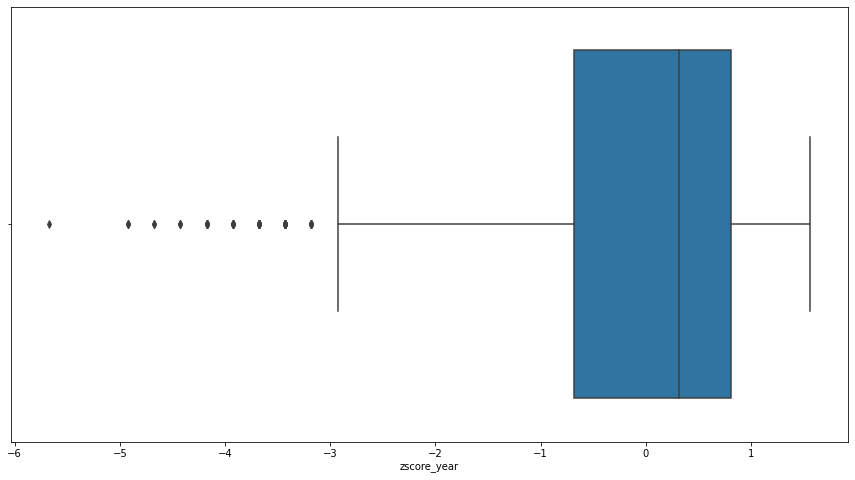

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


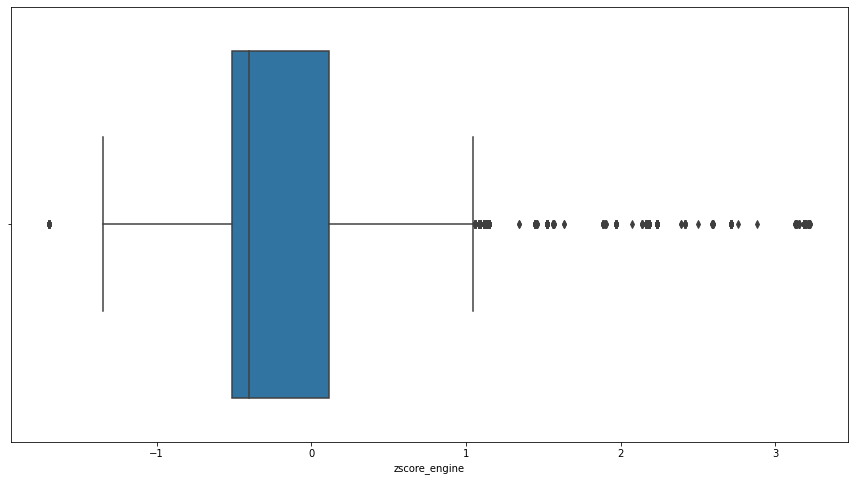

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


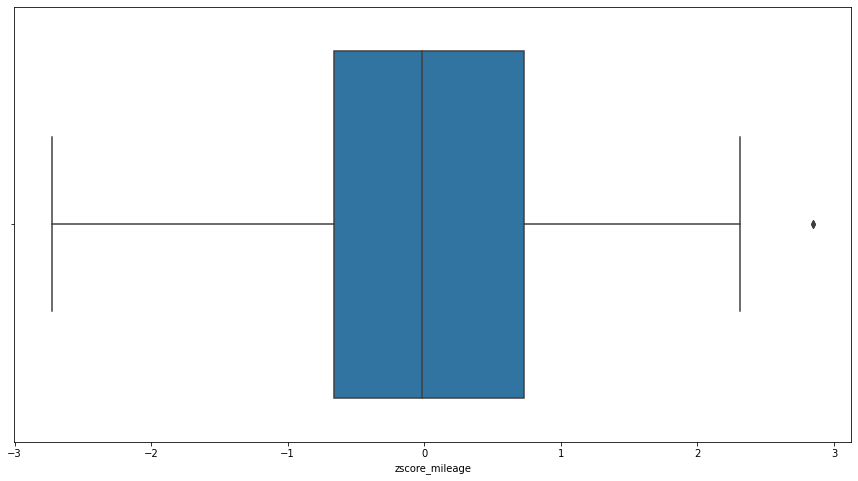

In [75]:
zs = ['zscore_selling_price', 'zscore_km_driven', 'zscore_year', 'zscore_engine', 'zscore_mileage']

for z in zs:
    sns.boxplot(df[z])
    plt.show()

#### Let's leave the outlier trimming at this for the time being, we can always return to it and cut some additional data out if our model is not performing to expectations

In [76]:
df = df.drop(zs, axis=1)

In [77]:
df = df.drop(['zscore_max_power', 'zscore_seats'], axis=1)

### Additional EDA

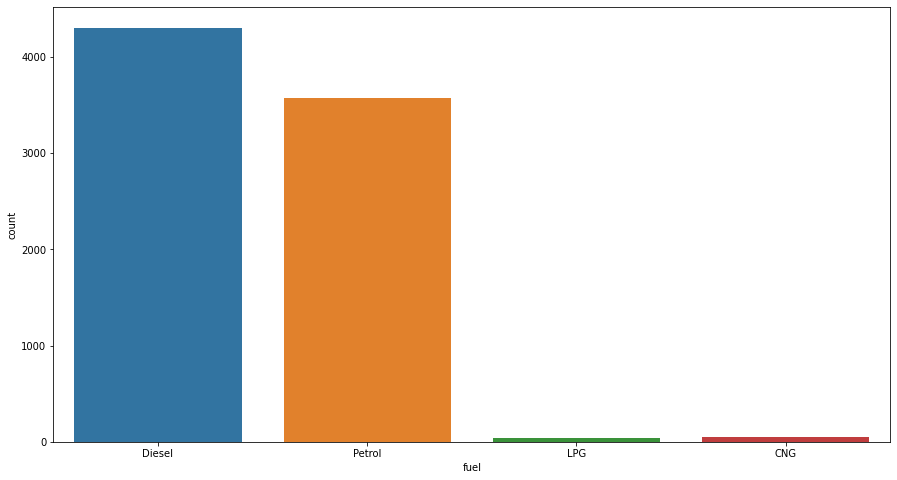

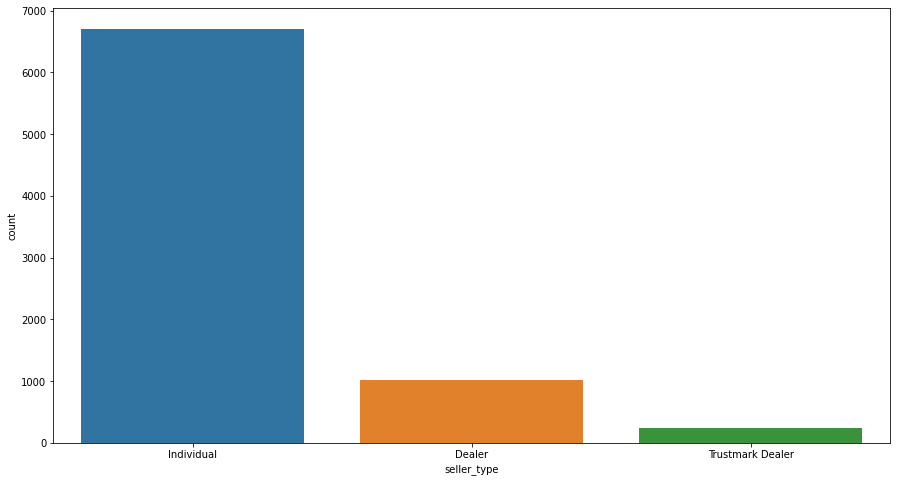

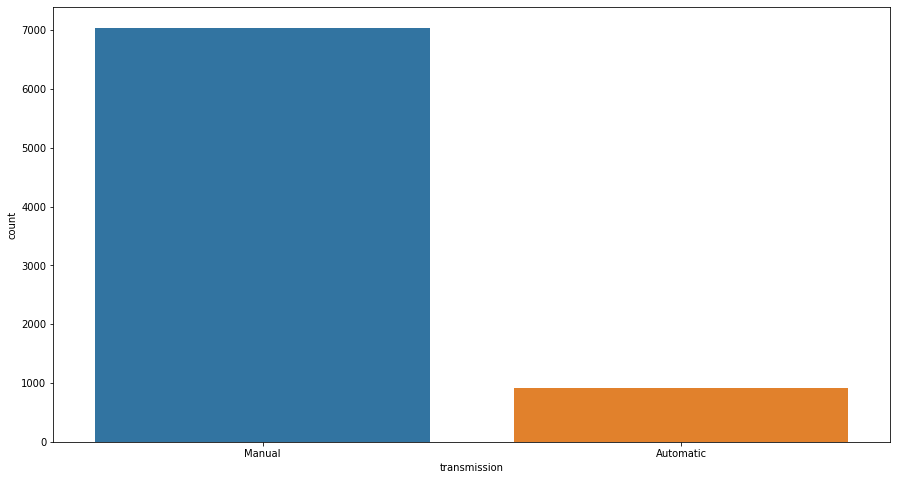

In [78]:
cats = ['fuel', 'seller_type', 'transmission']
for c in cats:
    sns.countplot(x=c, data=df)
    plt.show()

As we previously have done, we'll simply be label encoding the categorical columns in the following manner:
1. For the seller type, the individual can be a '0', the dealer will be '1', and the trustmark dealer will be '2'.
2. For fuel we're going to modify it slightly from our previous run: Diesel will be 0, petrol will be 1, and 'LPG' and 'CNG' will both become 2 (the two will effectively be combined into one).
3. Simple binary encoding for transmission, 0 if manual, 1 if automatic

In [79]:
#Wrapper for seller_type
mapp = {'Individual':0, 'Dealer':1, 'Trustmark Dealer':2}
df.seller_type = df.seller_type.replace(mapp)

#Wrapper for fuel
mapp2 = {'Diesel': 0, 'Petrol': 1, 'LPG': 2, 'CNG': 2}
df.fuel= df.fuel.replace(mapp2)

#Simple binary encoding, 0 if manual, 1 if automatic
mapper = {'Manual':0, 'Automatic':1}
df.transmission = df.transmission.replace(mapper)
df.transmission.value_counts()

df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,2014,450000,145500,0,0,0,0,23.40,1248,74.00,190Nm@ 2000rpm,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0
2,2006,158000,140000,1,0,0,1,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,2010,225000,127000,0,0,0,0,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,0,18.50,1197,82.85,113.7Nm@ 4000rpm,5.0
8124,2007,135000,119000,0,0,0,1,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,2009,382000,120000,0,0,0,0,19.30,1248,73.90,190Nm@ 2000rpm,5.0
8126,2013,290000,25000,0,0,0,0,23.57,1396,70.00,140Nm@ 1800-3000rpm,5.0


In [80]:
df.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          1
torque           221
seats            220
dtype: int64

<AxesSubplot:xlabel='seats', ylabel='Count'>

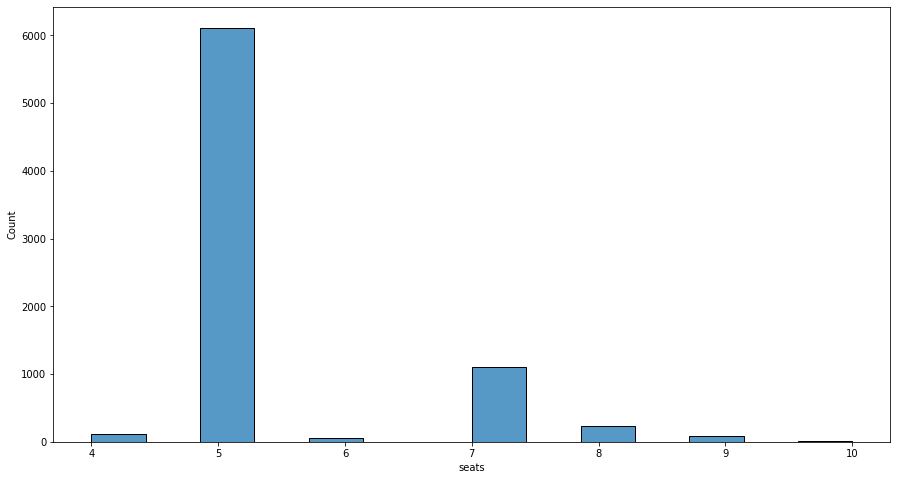

In [81]:
sns.histplot(x='seats', data=df)

In [82]:
# We will impute the seats NaN values with 5, the most common occurance
df.seats = df.seats.fillna(value=5.0)
print(f'Number of nans for seats column: {df.seats.isna().sum()}')

Number of nans for seats column: 0


In [83]:
df = df.drop(['torque'], axis = 1)
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,0,0,0,0,23.40,1248,74.00,5.0
1,2014,370000,120000,0,0,0,1,21.14,1498,103.52,5.0
2,2006,158000,140000,1,0,0,1,17.70,1497,78.00,5.0
3,2010,225000,127000,0,0,0,0,23.00,1396,90.00,5.0
4,2007,130000,120000,1,0,0,0,16.10,1298,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,1,0,0,0,18.50,1197,82.85,5.0
8124,2007,135000,119000,0,0,0,1,16.80,1493,110.00,5.0
8125,2009,382000,120000,0,0,0,0,19.30,1248,73.90,5.0
8126,2013,290000,25000,0,0,0,0,23.57,1396,70.00,5.0


In [84]:
df.max_power = df.max_power.fillna(value=impute_value_mp)
df.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

## Scaling and building our model

In [85]:
y = df.selling_price
X = df.drop('selling_price', axis=1)

### Linear Regression

In [86]:
#Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 1)

#Scaling the data for Linear Regression
    
scaler = StandardScaler()

scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
scaled_X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

# Running linear regression

LR_2 = LinearRegression()
LR_2.fit(scaled_X_train, y_train)
y_pred_LR_2 = LR_2.predict(scaled_X_test)


### XGBoostRegressor

In [87]:
xgbr_2 = XGBRegressor(verbosity=0)
xgbr_2.fit(X_train, y_train)
y_pred_X_2 = xgbr_2.predict(X_test)

In [88]:
df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,0.582183,270351.821424,183487547550.807343,428354.464843,Linear Regression
0,0.970595,66802.167023,13703221977.427296,117060.761903,XGBR


In [89]:
df_metrics_LR2 = get_metrics(y_pred_LR_2, y_test, 'Linear Regression - Revised')
df_metrics_X2 = get_metrics(y_pred_X_2, y_test, 'XGBR - revised')

df_metrics = pd.concat([df_metrics, df_metrics_LR2, df_metrics_X2], axis=0)
df_metrics

,r2 coeff.,MAE,MSE,RMSE,Type of model
0,0.582183,270351.821424,183487547550.807343,428354.464843,Linear Regression
0,0.970595,66802.167023,13703221977.427296,117060.761903,XGBR
0,0.581912,196667.74801,92492856579.598984,304126.382577,Linear Regression - Revised
0,0.949008,65068.332318,16148647360.152979,127077.32827,XGBR - revised


Conclusion: Linear Regression improved ever so slightly, XGBR got worst

## Hyperparameter Optimization

In [90]:
#To be continued...